In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('C:/Users/Rubina/Downloads/bank-additional-full.csv', delimiter=';')

In [3]:
dataset.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#Dealing with missing values. The values labelled "unknown" could be treated as a class label itself

In [5]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


Missing Values

In [6]:
dataset.replace('unknown', np.NaN, inplace=True)

In [7]:
dataset.isnull().sum()/len(dataset)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [8]:
# Number of distinct values in dataset variables
for i, column in enumerate(dataset.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(dataset[column].nunique()))

0. Age: 78
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1544
11. Campaign: 42
12. Pdays: 27
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 316
19. Nr.Employed: 11
20. Y: 2


In [9]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                     

Exploratory data analysis

i. Univariate analysis and segmented univariate analysis

a. Categorical variables

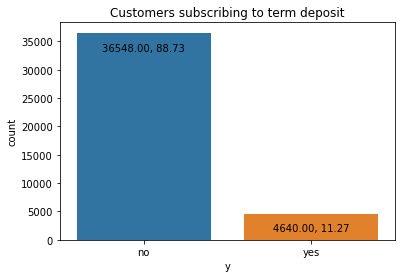

In [10]:
ax = sns.countplot(x = dataset["y"])  #Imbalanced dataset
label_values(ax, spacing=-20)
plt.title('Customers subscribing to term deposit')
plt.show()

Job


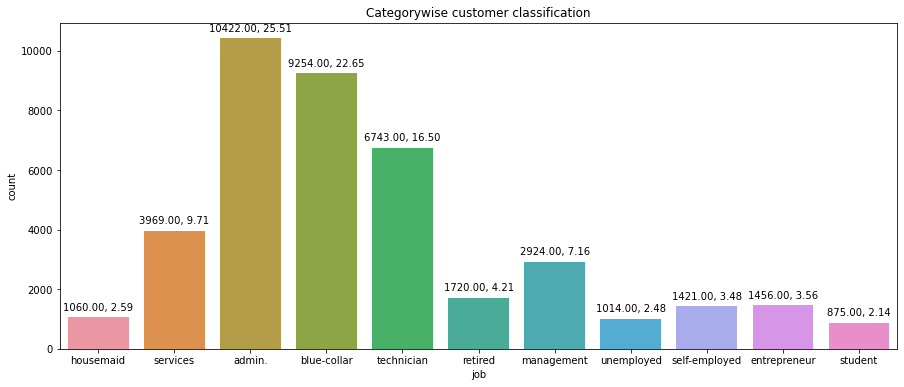

Marital


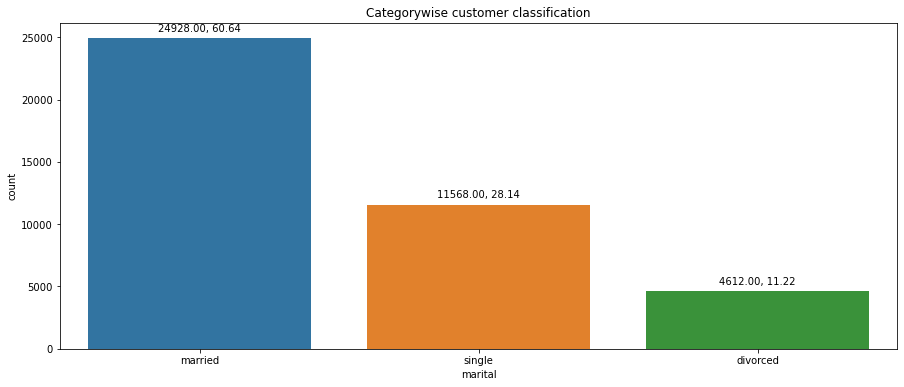

Education


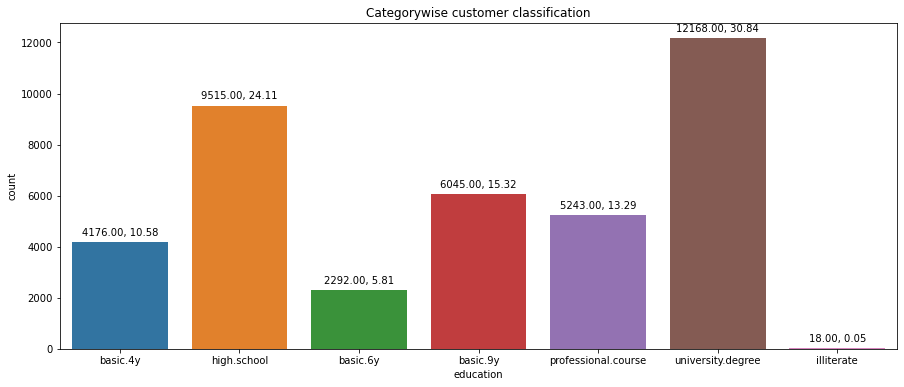

Default


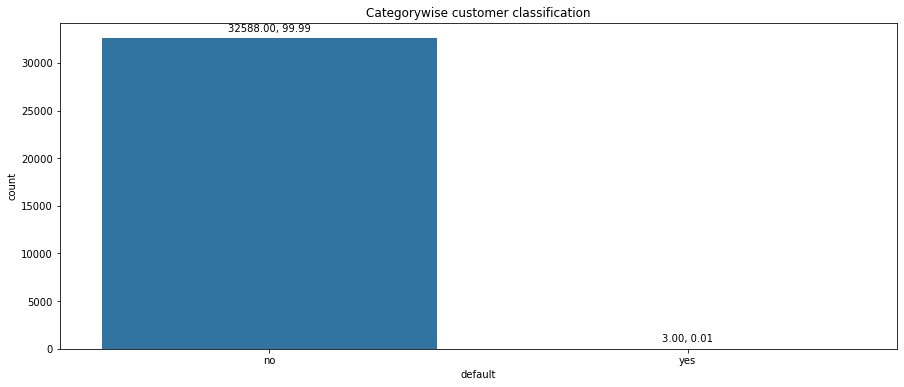

Housing


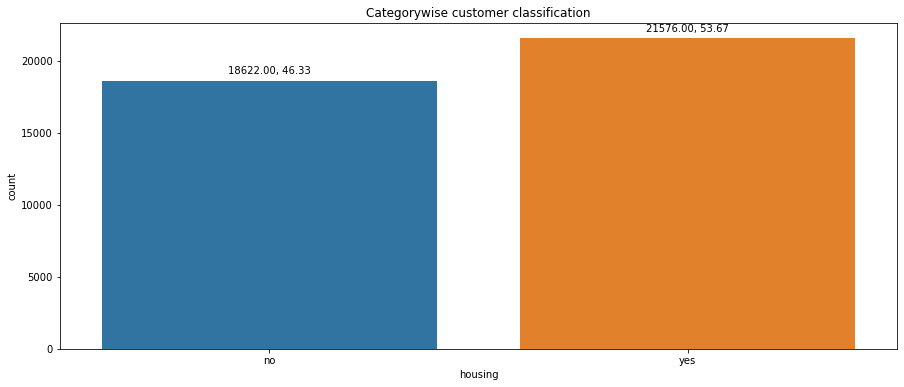

Loan


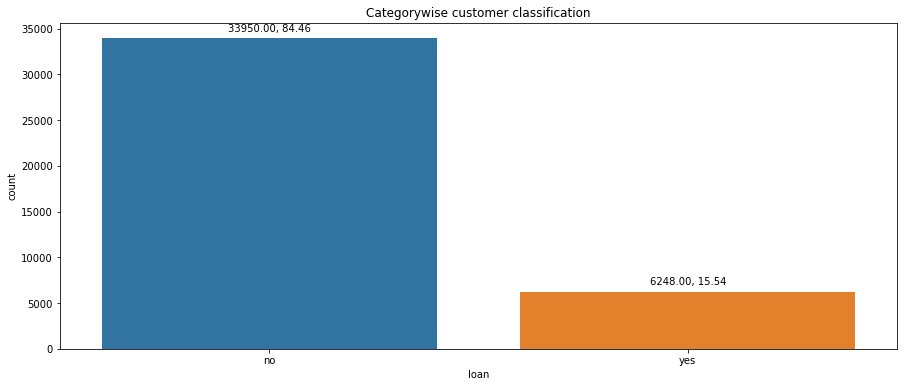

Contact


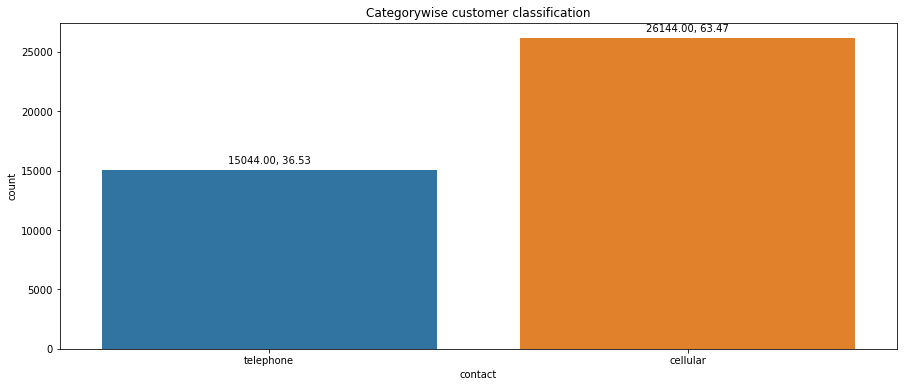

Month


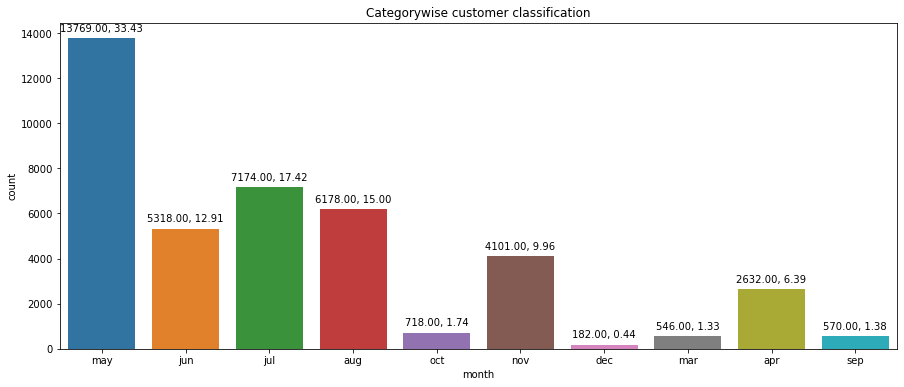

Day_Of_Week


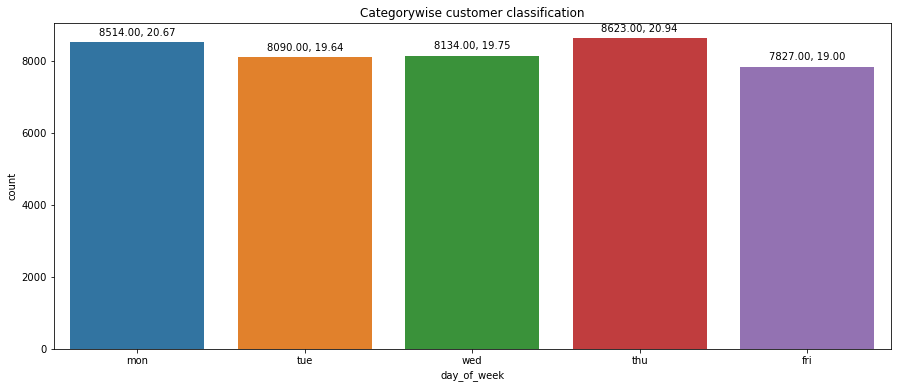

Poutcome


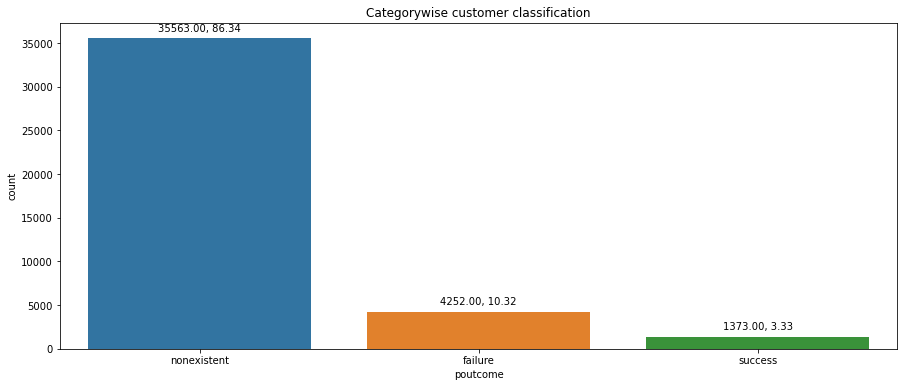

In [11]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = dataset[column])
    label_values(ax)
    plt.title('Categorywise customer classification')
    plt.show()

Job


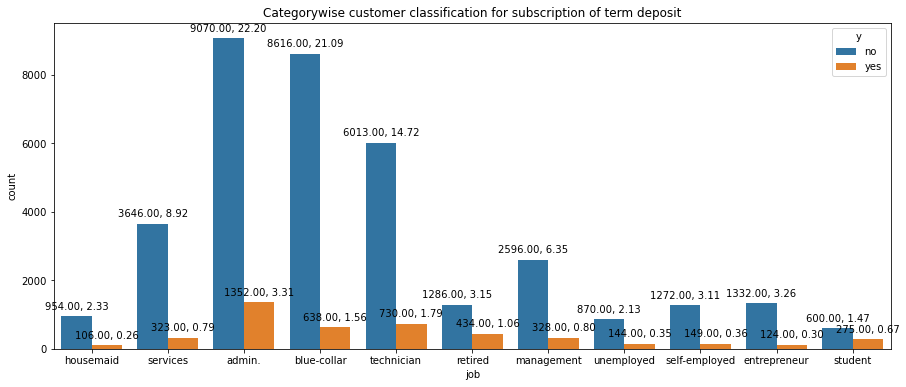

Marital


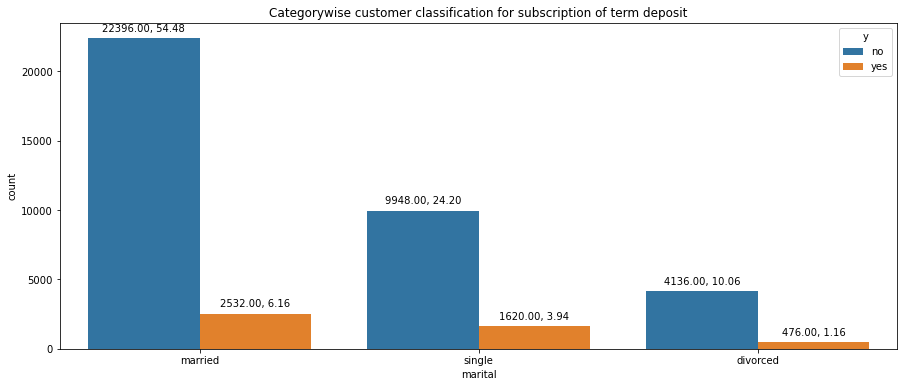

Education


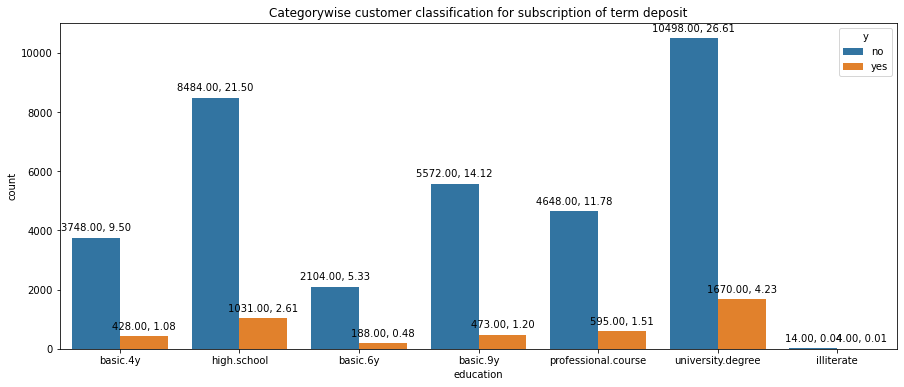

Default


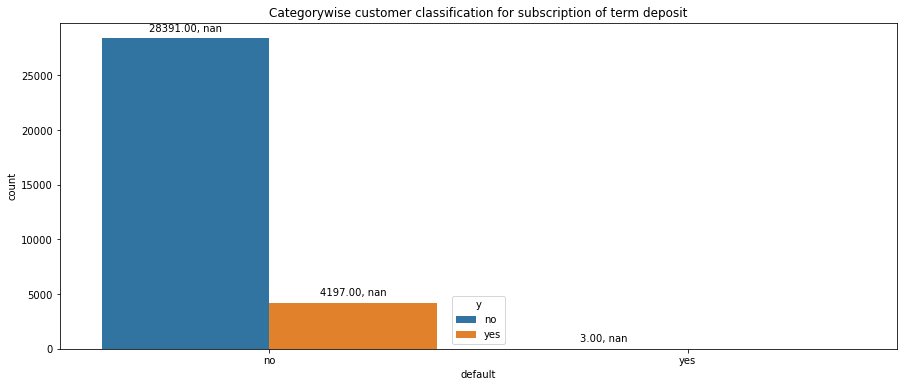

Housing


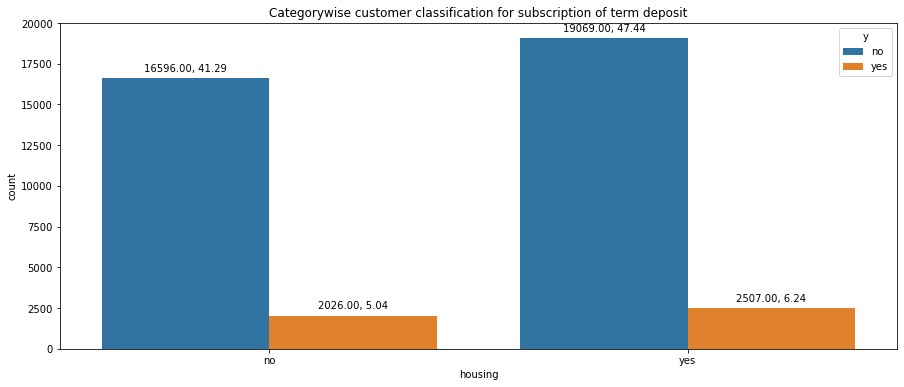

Loan


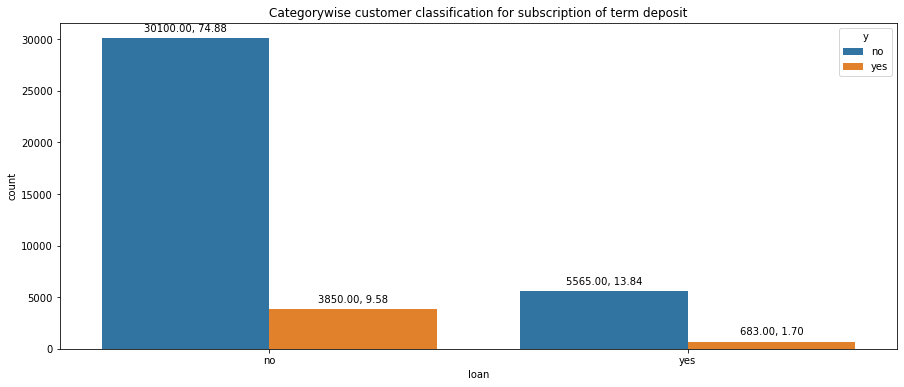

Contact


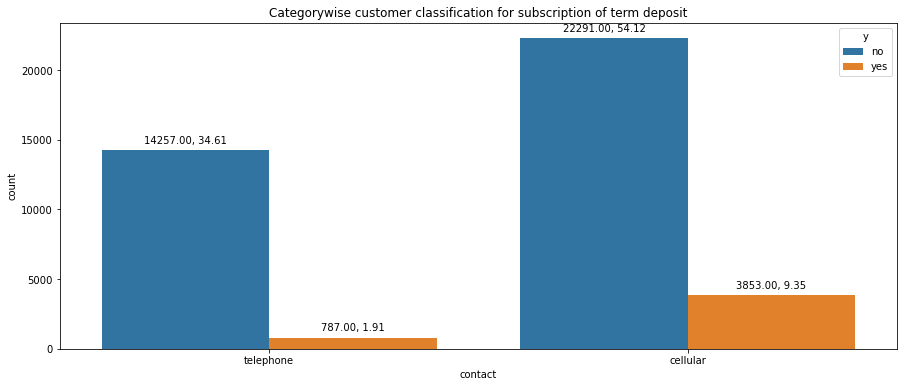

Month


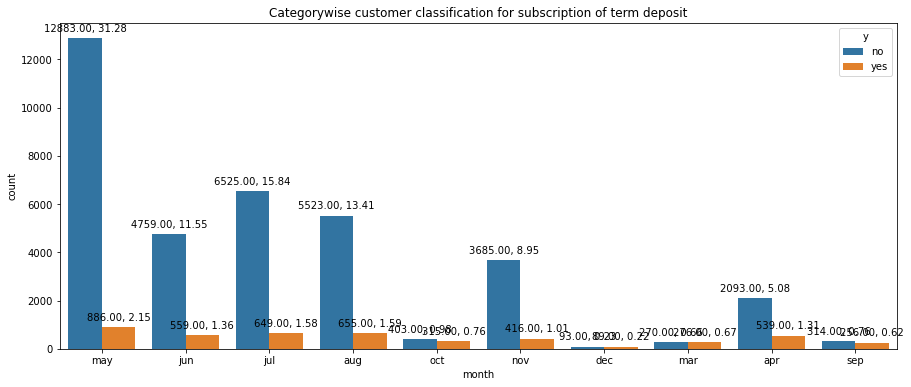

Day_Of_Week


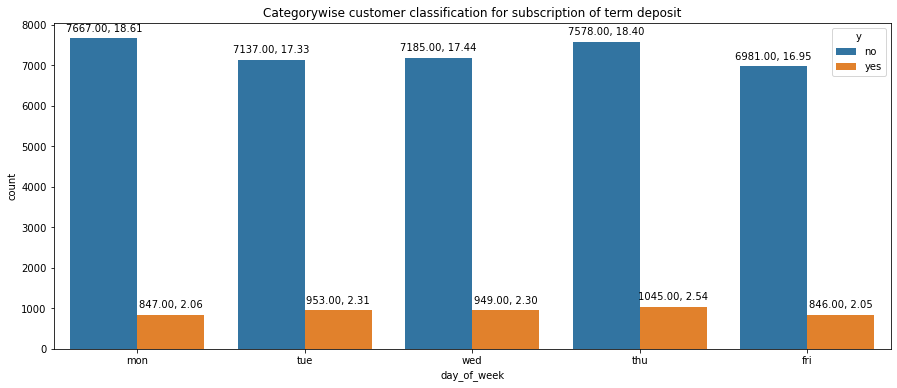

Poutcome


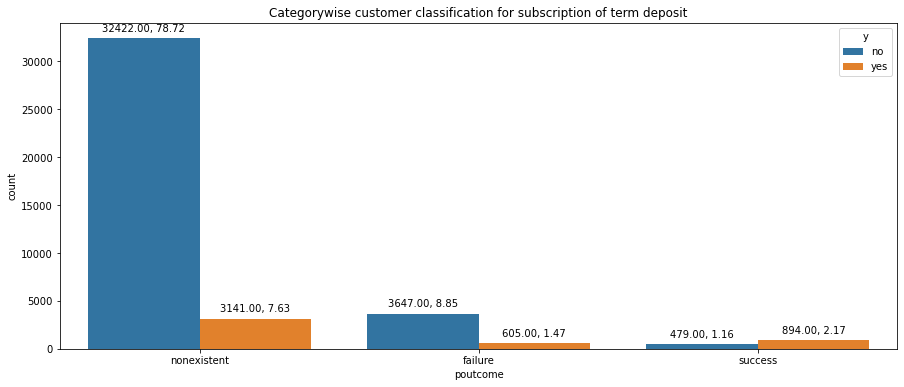

In [12]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = dataset[column], hue=dataset["y"])
    label_values(ax)
    plt.title('Categorywise customer classification for subscription of term deposit')
    plt.show()

In [13]:
# Default variable has no impact on the client subscribing for term deposit.
dataset.drop(["default"], axis = 1, inplace=True)

In [14]:
var_categorical = list(set(var_categorical) - set(['default']))

In [15]:
dataset.dropna(inplace=True)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   housing         38245 non-null  object 
 5   loan            38245 non-null  object 
 6   contact         38245 non-null  object 
 7   month           38245 non-null  object 
 8   day_of_week     38245 non-null  object 
 9   duration        38245 non-null  int64  
 10  campaign        38245 non-null  int64  
 11  pdays           38245 non-null  int64  
 12  previous        38245 non-null  int64  
 13  poutcome        38245 non-null  object 
 14  emp.var.rate    38245 non-null  float64
 15  cons.price.idx  38245 non-null  float64
 16  cons.conf.idx   38245 non-null  float64
 17  euribor3m       38245 non-null 

b. Numerical Variables

In [17]:
#### Drop the duration (as Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
duration = dataset["duration"]
dataset.drop(["duration"], axis = 1, inplace=True)

In [18]:
var_numerical = list(set(var_numerical) - set(['duration']))

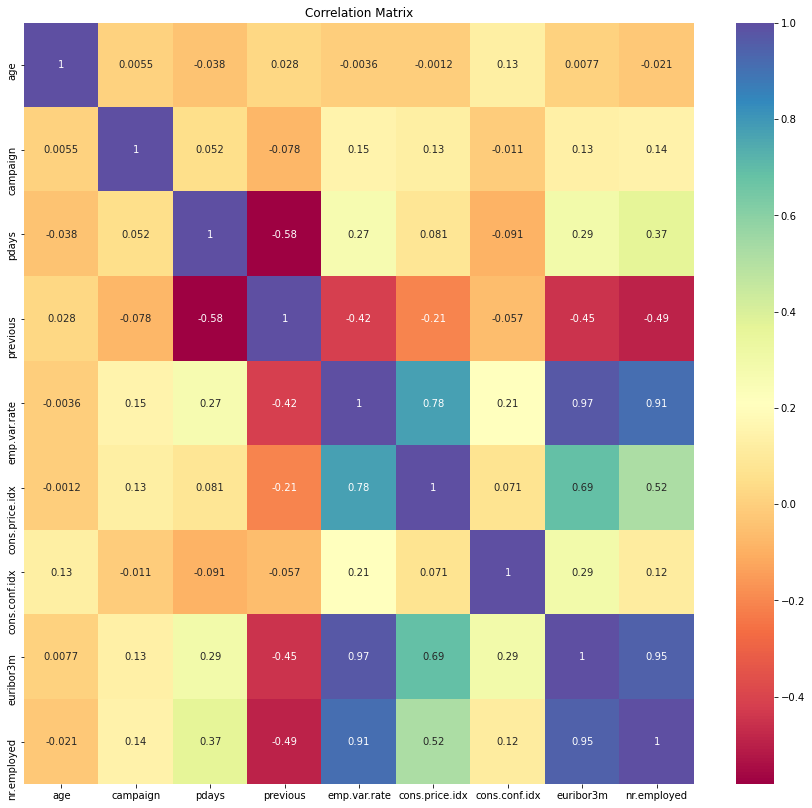

In [19]:
plt.figure(figsize=(15, 14))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

Analysing highly correlated variables

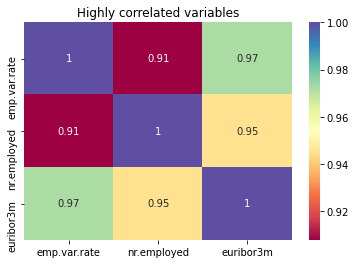

In [20]:
sns.heatmap(dataset[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.title('Highly correlated variables')
plt.show()

Positive high correlation between: 
1. 'emp.var.rate' and 'nr.employed' 
2. 'emp.var.rate' and 'euribor3m' 
3. 'euribor3m' and 'nr.employed'

Euribor stands for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other, which is often referred to as “the price of money”.#Wikipedia

linkcode
With this we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 'nr.employed' as 'euribor' also give us the price of money in current market.

In [21]:
dataset.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [22]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

Cons.Price.Idx


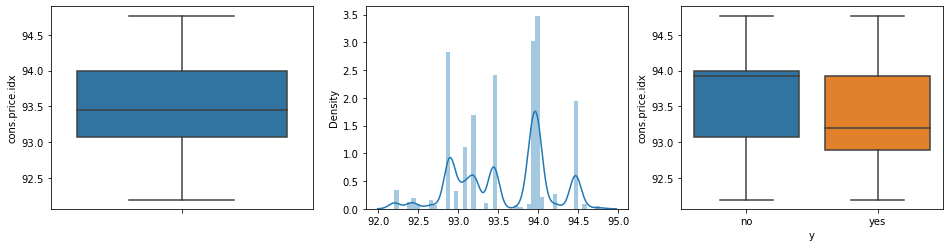

Pdays


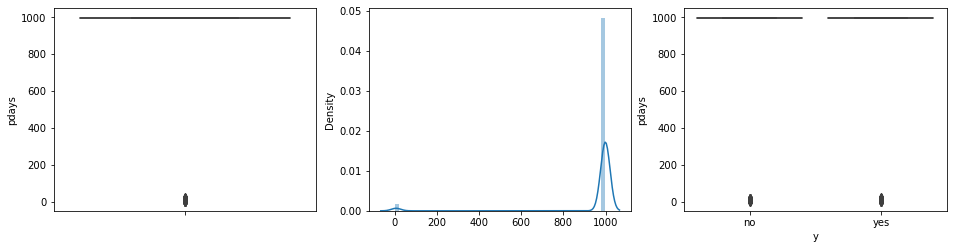

Euribor3M


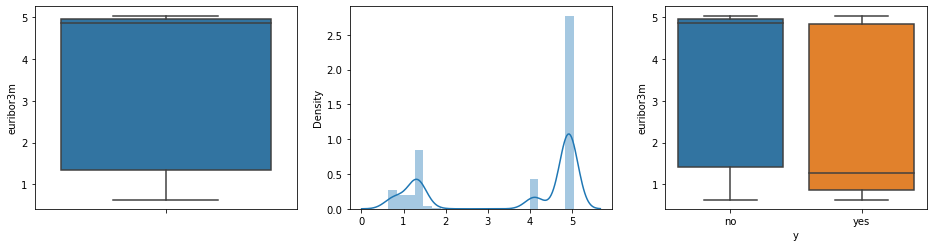

Age


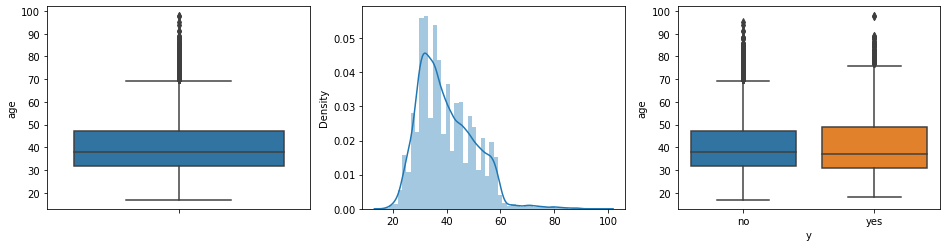

Campaign


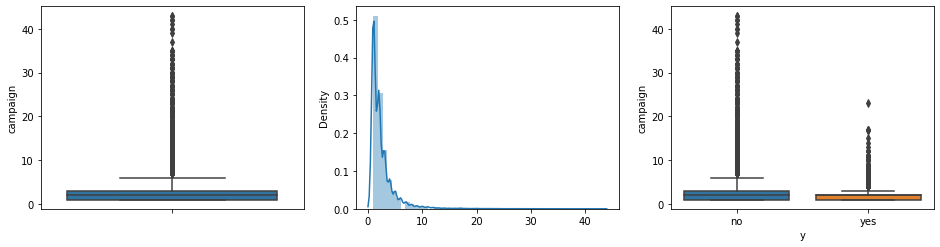

Cons.Conf.Idx


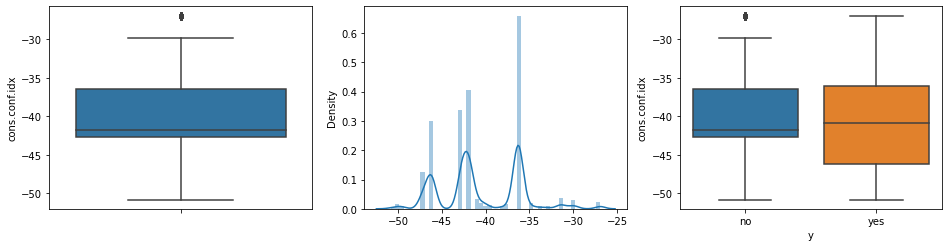

Previous


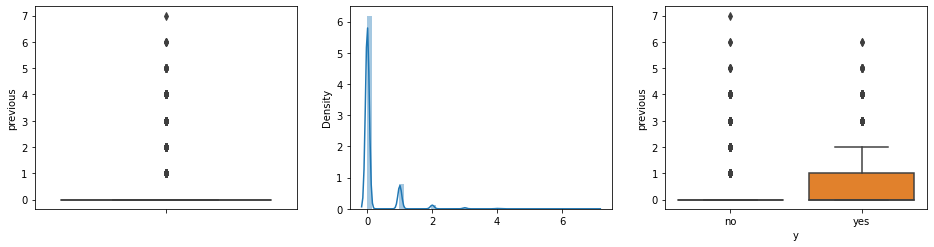

In [23]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = dataset[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = dataset[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = dataset["y"], y = dataset[column])
    i += 1
    plt.show()

In [24]:
dataset[var_numerical].describe()

cons.price.idx         pdays     euribor3m           age      campaign  \
count    38245.000000  38245.000000  38245.000000  38245.000000  38245.000000   
mean        93.570313    963.531651      3.623298     39.860871      2.566662   
std          0.576367    184.295254      1.730226     10.289488      2.767473   
min         92.201000      0.000000      0.634000     17.000000      1.000000   
25%         93.075000    999.000000      1.344000     32.000000      1.000000   
50%         93.444000    999.000000      4.857000     38.000000      2.000000   
75%         93.994000    999.000000      4.961000     47.000000      3.000000   
max         94.767000    999.000000      5.045000     98.000000     43.000000   

       cons.conf.idx      previous  
count   38245.000000  38245.000000  
mean      -40.541164      0.170009  
std         4.623200      0.487169  
min       -50.800000      0.000000  
25%       -42.700000      0.000000  
50%       -41.800000      0.000000  
75%       -36.400000      0.000000  
max       -26.900000      7.000000

In [25]:
print(dataset["campaign"].quantile(0.05), len(dataset[dataset["campaign"]<dataset["campaign"].quantile(0.05)] ))
print(dataset["campaign"].quantile(0.95), len(dataset[dataset["campaign"]>dataset["campaign"].quantile(0.95)] ))

1.0 0
7.0 1636


In [26]:
dataset1 = dataset[(dataset["campaign"] > 23) & (dataset["y"] == 'yes')]
len(dataset1[['campaign', 'y']])

0

In [27]:
dataset1 = dataset[(dataset["campaign"] > 8) & (dataset["y"] == 'yes')]
print(len(dataset1[['campaign', 'y']]), len(dataset[dataset["campaign"]>8]))

49 1264


In [28]:
# We will convert all the values above 10 in campaign to 10
dataset["campaign"] = dataset["campaign"].apply(lambda x: 8 if x > 8 else x)

In [29]:
print(dataset["age"].quantile(0.05), len(dataset[dataset["age"]<dataset["age"].quantile(0.05)] ))
print(dataset["age"].quantile(0.95), len(dataset[dataset["age"]>dataset["age"].quantile(0.95)] ))

26.0 1484
58.0 1435


In [30]:
print(dataset["previous"].quantile(0.05), len(dataset[dataset["previous"]<dataset["previous"].quantile(0.05)] ))
print(dataset["previous"].quantile(0.95), len(dataset[dataset["previous"]>2] ))

0.0 0
1.0 273


In [31]:
for i in range(1, max(dataset["previous"])+1):
    print(i, end = " ")
    dataset1 = dataset[(dataset["previous"] >= i) & (dataset["y"] == 'yes')]
    print(len(dataset1[['previous', 'y']]), len(dataset[dataset["previous"]>= i]))

1 1336 5179
2 466 945
3 160 273
4 43 78
5 13 21
6 2 5
7 0 1


In [32]:
# Converting all the values above 2 in previous to 2
dataset["previous"] = dataset["previous"].apply(lambda x: 2 if x >= 2 else x)

In [33]:
print(dataset["pdays"].quantile(0.05), len(dataset[dataset["pdays"]<dataset["pdays"].quantile(0.05)] ))
print(dataset["pdays"].quantile(0.95), len(dataset[dataset["pdays"]>dataset["pdays"].quantile(0.95)] ))

999.0 1366
999.0 0


In [34]:
dataset1 = dataset[(dataset["pdays"] >= 999) & (dataset["y"] == 'yes')]
print(len(dataset1[['pdays', 'y']]), len(dataset[dataset["pdays"]>=999]))
dataset1 = dataset[(dataset["pdays"] < 999) & (dataset["y"] == 'yes')]
print(len(dataset1[['pdays', 'y']]), len(dataset[dataset["pdays"]<999]))
dataset1 = dataset[(dataset["pdays"] < 28) & (dataset["y"] == 'yes')]
print(len(dataset1[['pdays', 'y']]), len(dataset[dataset["pdays"]<28]))
dataset1 = dataset[(dataset["pdays"] < 20) & (dataset["y"] == 'yes')]
print(len(dataset1[['pdays', 'y']]), len(dataset[dataset["pdays"]<20]))
dataset1 = dataset[(dataset["pdays"] < 10) & (dataset["y"] == 'yes')]
print(len(dataset1[['pdays', 'y']]), len(dataset[dataset["pdays"]<10]))

3393 36879
865 1366
865 1366
858 1358
734 1140


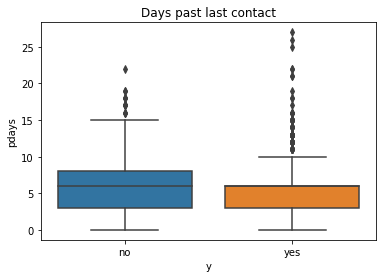

In [35]:
# Look into the pdays values which are less than 999
dataset1 = dataset[~(dataset["pdays"] >= 999)]
sns.boxplot(x = dataset1["y"], y = dataset1['pdays'])
plt.title('Days past last contact')
plt.show()

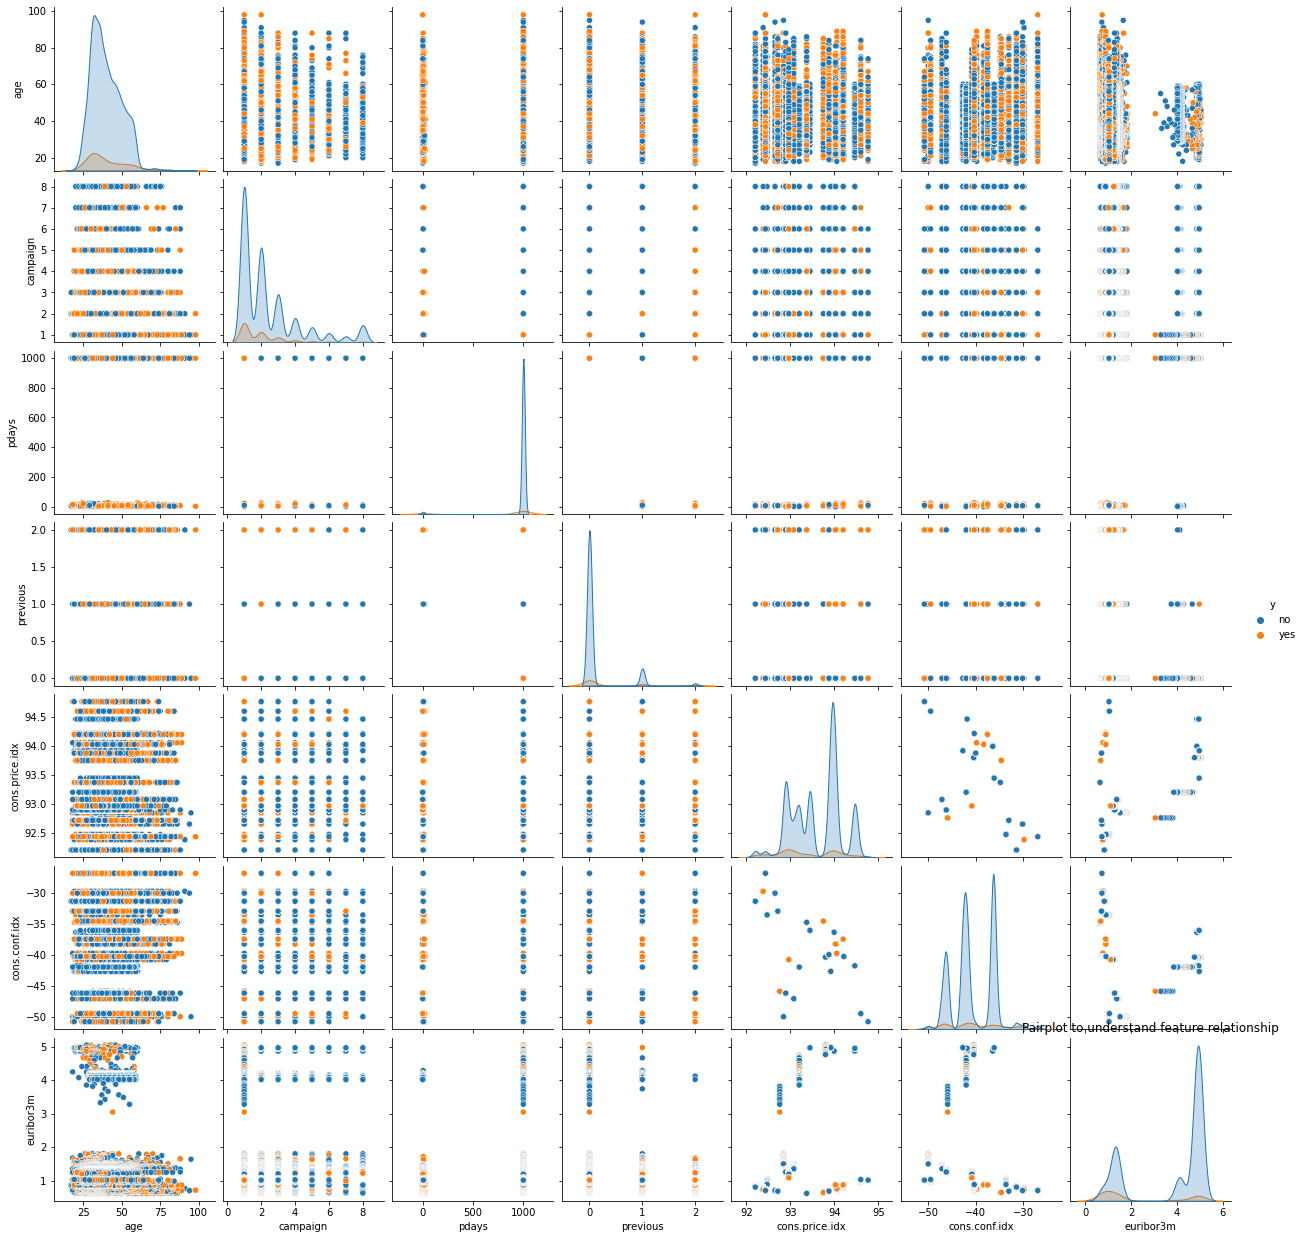

In [36]:
# visualizing numerical columns
sns.pairplot(hue='y', data = dataset)
plt.title('Pairplot to understand feature relationship')
plt.show()

1. Campaign: If the number of contacts performed during this campaign and for this client become more than 23 then there is very high possibility that client will not subscribe for term deposit. Even if we contact a person more than 8 times probability is still low.
**We will drop this column as it will not be known before hand. But it is important to see that we should not contact any client more than 8 times during any campaign.**<br>
2. Consumer price index: If this value is high then probability of client not subscribing is slightly higher. <br>
3. Previous: If we contact client before a campaign then there is high chances that client will subscribe. We converted all the values above 2 to 2 based on the given data
<br>
4. Euribor 3 month rate: If this rate is high there is high chances of clients not subscribing to term deposit.<br>
5. Pdays: If we start contacting client 1 month before campaign there is high probability of that client subscribing.

In [37]:
dataset.drop(['campaign'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['campaign']))

In [38]:
dataset.isnull().sum()/len(dataset)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
pdays             0.0
previous          0.0
poutcome          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
y                 0.0
dtype: float64

In [39]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['job', 'education', 'contact', 'day_of_week', 'marital', 'loan', 'housing', 'month', 'poutcome']
6 ['cons.price.idx', 'pdays', 'euribor3m', 'age', 'cons.conf.idx', 'previous']


In [40]:
print(dataset["loan"].value_counts())
print(dataset["housing"].value_counts())
print(dataset["contact"].value_counts())
print(dataset["y"].value_counts())

no     32286
yes     5959
Name: loan, dtype: int64
yes    20578
no     17667
Name: housing, dtype: int64
cellular     24441
telephone    13804
Name: contact, dtype: int64
no     33987
yes     4258
Name: y, dtype: int64


In [41]:
varlist = ['loan', 'housing', 'y']

dataset[varlist] = dataset[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

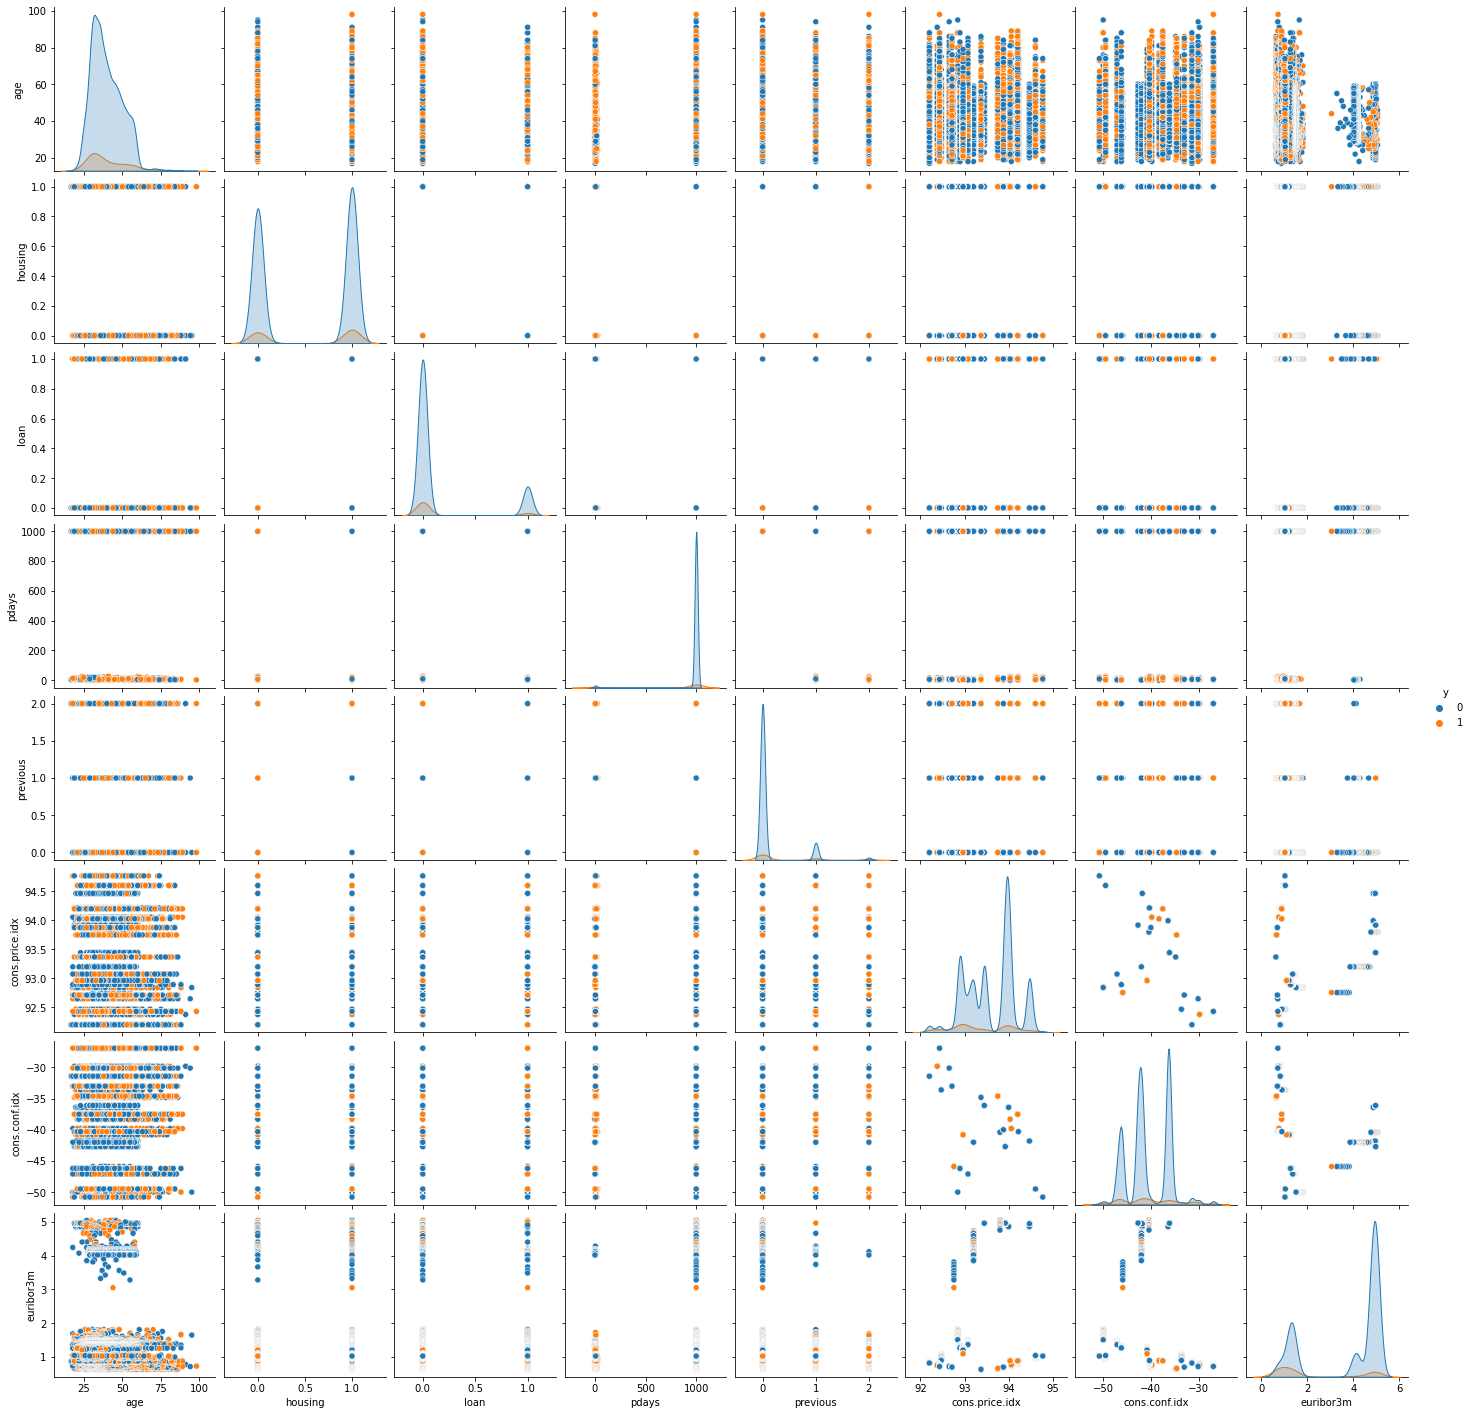

In [42]:
# visualizing numerical columns
sns.pairplot(hue='y', data = dataset)
plt.show()

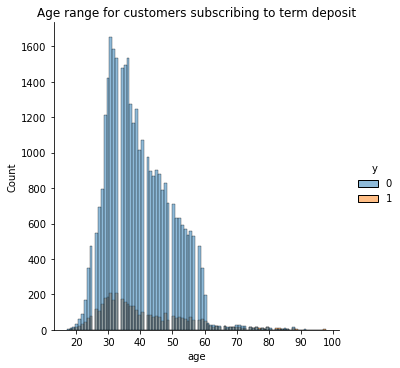

In [43]:
sns.displot(x = 'age', hue='y', data=dataset)
plt.title("Age range for customers subscribing to term deposit")
plt.show()

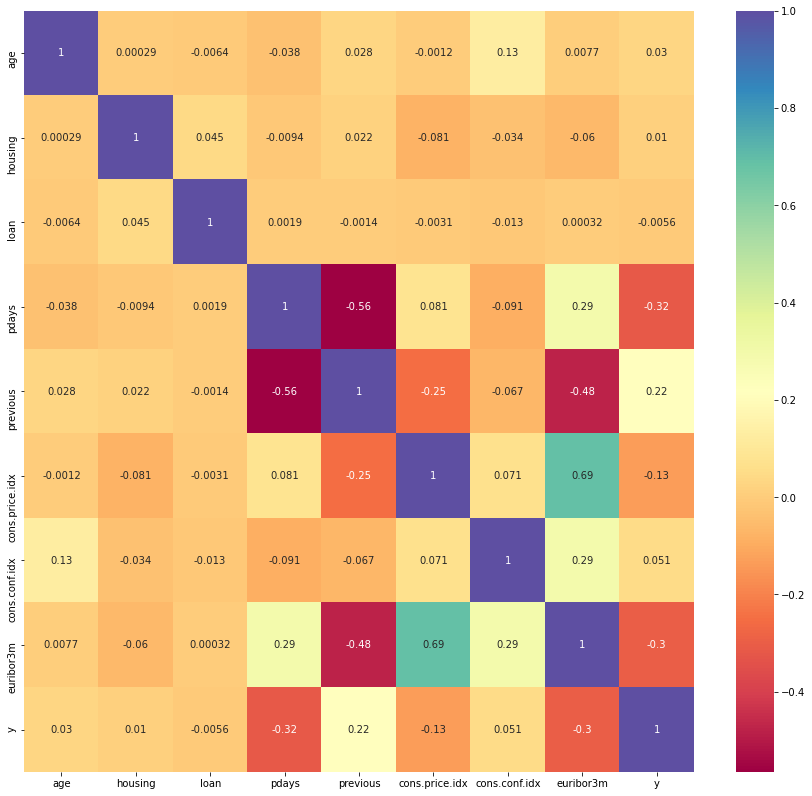

In [44]:
plt.figure(figsize=(15, 14))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.show()

In [45]:
# Get the dummy variables for contact, poutcome , job, month, marital, day_of_week, education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 
# (dropping redundant column)

contact = pd.get_dummies(dataset.contact, drop_first=True)
poutcome = pd.get_dummies(dataset.poutcome, drop_first=True)
job = pd.get_dummies(dataset.job, drop_first=True)
month = pd.get_dummies(dataset.month, drop_first=True)
marital = pd.get_dummies(dataset.marital, drop_first=True)
day_of_week = pd.get_dummies(dataset.day_of_week, drop_first=True)
education = pd.get_dummies(dataset.education, drop_first=True)

In [46]:
# Concat the dummy columns to the dataframe
dataset = pd.concat([dataset, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
dataset.head()

age        job  marital    education  housing  loan    contact month  \
0   56  housemaid  married     basic.4y        0     0  telephone   may   
1   57   services  married  high.school        0     0  telephone   may   
2   37   services  married  high.school        1     0  telephone   may   
3   40     admin.  married     basic.6y        0     0  telephone   may   
4   56   services  married  high.school        0     1  telephone   may   

  day_of_week  pdays  ...  mon thu  tue  wed  basic.6y  basic.9y  high.school  \
0         mon    999  ...    1   0    0    0         0         0            0   
1         mon    999  ...    1   0    0    0         0         0            1   
2         mon    999  ...    1   0    0    0         0         0            1   
3         mon    999  ...    1   0    0    0         1         0            0   
4         mon    999  ...    1   0    0    0         0         0            1   

   illiterate  professional.course  university.degree  
0           0                    0                  0  
1           0                    0                  0  
2           0                    0                  0  
3           0                    0                  0  
4           0                    0                  0  

[5 rows x 50 columns]

In [47]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
dataset.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
dataset.head()

age  housing  loan  pdays  previous  cons.price.idx  cons.conf.idx  \
0   56        0     0    999         0          93.994          -36.4   
1   57        0     0    999         0          93.994          -36.4   
2   37        1     0    999         0          93.994          -36.4   
3   40        0     0    999         0          93.994          -36.4   
4   56        0     1    999         0          93.994          -36.4   

   euribor3m  y  telephone  ...  mon  thu  tue  wed  basic.6y  basic.9y  \
0      4.857  0          1  ...    1    0    0    0         0         0   
1      4.857  0          1  ...    1    0    0    0         0         0   
2      4.857  0          1  ...    1    0    0    0         0         0   
3      4.857  0          1  ...    1    0    0    0         1         0   
4      4.857  0          1  ...    1    0    0    0         0         0   

   high.school  illiterate  professional.course  university.degree  
0            0           0                    0                  0  
1            1           0                    0                  0  
2            1           0                    0                  0  
3            0           0                    0                  0  
4            1           0                    0                  0  

[5 rows x 43 columns]

In [48]:
dataset.columns, len(dataset.columns)

(Index(['age', 'housing', 'loan', 'pdays', 'previous', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'y', 'telephone', 'nonexistent',
        'success', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed', 'basic.6y',
        'basic.9y', 'high.school', 'illiterate', 'professional.course',
        'university.degree'],
       dtype='object'),
 43)

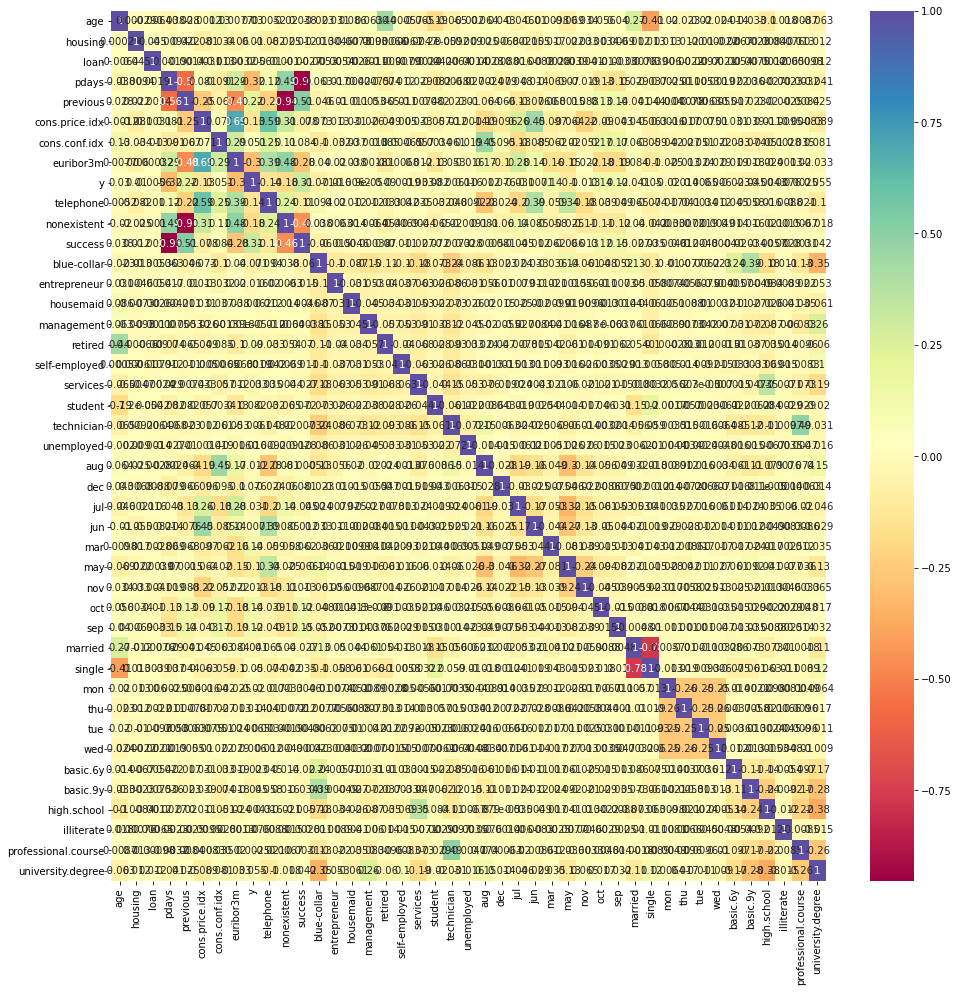

In [49]:
plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.show()

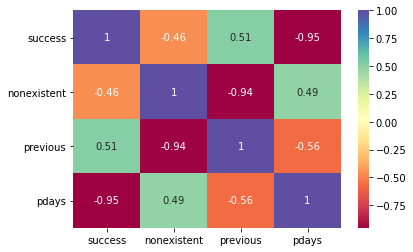

In [50]:
sns.heatmap(dataset[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()

Negative Correlation: 
1. Previous v/s Nonexistent 
2. Pdays v/s Success

In [51]:
dataset.drop(['previous', 'pdays'], axis = 1, inplace = True)

In [52]:
var_numerical = list(set(var_numerical) - set(['previous', 'pdays']))

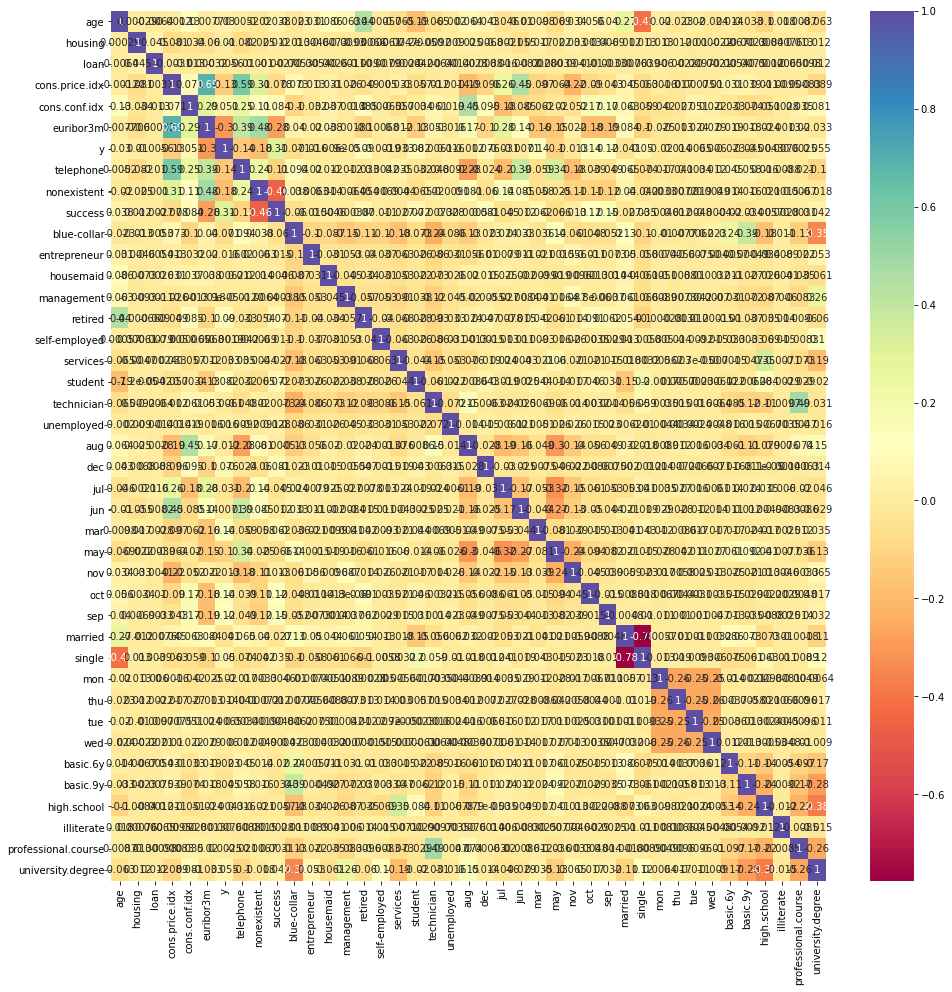

In [53]:
plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.show()

In [54]:
dataset.corr()['y']

age                    0.030130
housing                0.009996
loan                  -0.005603
cons.price.idx        -0.133084
cons.conf.idx          0.051424
euribor3m             -0.300580
y                      1.000000
telephone             -0.140866
nonexistent           -0.184489
success                0.311555
blue-collar           -0.071404
entrepreneur          -0.015897
housemaid             -0.006232
management             0.000090
retired                0.089646
self-employed         -0.001888
services              -0.032759
student                0.082182
technician            -0.006091
unemployed             0.016334
aug                   -0.012077
dec                    0.075847
jul                   -0.030556
jun                   -0.007129
mar                    0.144351
may                   -0.104725
nov                   -0.013458
oct                    0.142853
sep                    0.123514
married               -0.040845
single                 0.050106
mon     

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

Split data into train and test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# We will divide the training and testing set in 70% and 30% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.7, random_state = 100)

In [58]:
print("Train Dataset: "+ str(len(dataset_train)) + " Test Dataset: " + str(len(dataset_test)))
print("Train Target Label counts: ")
print(dataset_train["y"].value_counts())
print("Test Target Label counts: ")
print(dataset_test["y"].value_counts())

Train Dataset: 26771 Test Dataset: 11474
Train Target Label counts: 
0    23755
1     3016
Name: y, dtype: int64
Test Target Label counts: 
0    10232
1     1242
Name: y, dtype: int64


Rescaling the continuous variables

We use MinMaxScaler as our data is not normally distributed. This function can handle outliers as well

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
dataset_train[var_numerical] = scaler.fit_transform(dataset_train[var_numerical])

In [62]:
# Transform will operate on standardisation function and scales our values
dataset_test[var_numerical] = scaler.transform(dataset_test[var_numerical])

In [63]:
dataset_train.head()

age  housing  loan  cons.price.idx  cons.conf.idx  euribor3m  y  \
37704  0.246914        0     0        0.000000       0.811715   0.049195  1   
12535  0.172840        1     0        0.669135       0.338912   0.980730  0   
8698   0.271605        1     0        0.882307       0.376569   0.958966  0   
40425  0.086420        1     1        0.711613       0.523013   0.061437  0   
21067  0.456790        1     1        0.484412       0.615063   0.981637  1   

       telephone  nonexistent  success  ...  mon  thu  tue  wed  basic.6y  \
37704          0            0        1  ...    0    1    0    0         0   
12535          1            1        0  ...    1    0    0    0         0   
8698           1            1        0  ...    0    0    0    1         1   
40425          0            0        1  ...    0    0    0    0         0   
21067          0            1        0  ...    0    1    0    0         0   

       basic.9y  high.school  illiterate  professional.course  \
37704         0            0           0                    0   
12535         0            0           0                    0   
8698          0            0           0                    0   
40425         0            0           0                    0   
21067         0            1           0                    0   

       university.degree  
37704                  1  
12535                  1  
8698                   0  
40425                  1  
21067                  0  

[5 rows x 41 columns]

In [64]:
dataset_test.head()

age  housing  loan  cons.price.idx  cons.conf.idx  euribor3m  y  \
19269  0.407407        0     1        0.484412       0.615063   0.982317  0   
17957  0.358025        0     0        0.669135       0.338912   0.980957  0   
22711  0.506173        0     0        0.484412       0.615063   0.981637  0   
20420  0.395062        1     0        0.484412       0.615063   0.982090  0   
38658  0.246914        0     0        0.174591       0.866109   0.019270  0   

       telephone  nonexistent  success  ...  mon  thu  tue  wed  basic.6y  \
19269          0            1        0  ...    0    0    0    1         0   
17957          0            1        0  ...    0    0    1    0         0   
22711          0            1        0  ...    0    0    0    0         0   
20420          0            1        0  ...    0    0    1    0         1   
38658          0            0        0  ...    0    0    0    1         0   

       basic.9y  high.school  illiterate  professional.course  \
19269         0            1           0                    0   
17957         0            0           0                    0   
22711         0            1           0                    0   
20420         0            0           0                    0   
38658         0            1           0                    0   

       university.degree  
19269                  0  
17957                  1  
22711                  0  
20420                  0  
38658                  0  

[5 rows x 41 columns]

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38245 non-null  int64  
 1   housing              38245 non-null  int64  
 2   loan                 38245 non-null  int64  
 3   cons.price.idx       38245 non-null  float64
 4   cons.conf.idx        38245 non-null  float64
 5   euribor3m            38245 non-null  float64
 6   y                    38245 non-null  int64  
 7   telephone            38245 non-null  uint8  
 8   nonexistent          38245 non-null  uint8  
 9   success              38245 non-null  uint8  
 10  blue-collar          38245 non-null  uint8  
 11  entrepreneur         38245 non-null  uint8  
 12  housemaid            38245 non-null  uint8  
 13  management           38245 non-null  uint8  
 14  retired              38245 non-null  uint8  
 15  self-employed        38245 non-null 

Model Building

In [66]:
# Divide the train data into X and y
y_train = dataset_train.pop('y')
X_train = dataset_train

In [67]:
# Divide the test data into X and y

y_test = dataset_test.pop('y')
X_test = dataset_test

In [68]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26771, 40), (26771,), (11474, 40), (11474,))

We will user AUC for performance metrics as the target class is imbalanced.

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [70]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
from sklearn import metrics

In [72]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.3f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.3f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
# Train model using hyperparmeter tuning
def training_model_hyperparameter(model, scoring, params_grid, X_train, y_train):
    folds = StratifiedKFold(n_splits = 10, shuffle = True, random_state=100)

    grid = GridSearchCV(estimator = model, scoring=scoring, param_grid = params_grid, cv = folds, 
                           verbose=0, return_train_score=True, n_jobs=3)
    grid.fit(X_train, y_train)
    return grid

In [74]:
# Predict values and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

i. Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

a. Train Model

In [76]:
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)

In [77]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(logreg, X_train, y_train, X_test, y_test)

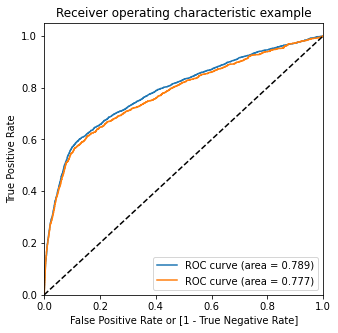

In [78]:
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [79]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.8992566583243061
Accuracy test:  0.9020393934111905


ii. Feature Selection Using RFE with 20 Features

In [80]:
from sklearn.feature_selection import RFE

In [81]:
logreg_rfe20 = LogisticRegression(random_state = 100)

In [82]:
rfe20 = RFE(logreg_rfe20, n_features_to_select = 20)
rfe20 = rfe20.fit(X_train, y_train)

In [83]:
# Column name, RFE is True/False, Ranking of column
print(list(zip(X_train, rfe20.support_,rfe20.ranking_)))
# Columns with RFE Support as True
col = X_train.columns[rfe20.support_]
print(len(col), col)
# Columns with RFE Support as False
X_train.columns[~rfe20.support_]

[('age', False, 18), ('housing', False, 8), ('loan', False, 9), ('cons.price.idx', True, 1), ('cons.conf.idx', True, 1), ('euribor3m', True, 1), ('telephone', True, 1), ('nonexistent', True, 1), ('success', True, 1), ('blue-collar', True, 1), ('entrepreneur', False, 2), ('housemaid', True, 1), ('management', False, 21), ('retired', True, 1), ('self-employed', False, 10), ('services', True, 1), ('student', True, 1), ('technician', False, 15), ('unemployed', False, 19), ('aug', False, 6), ('dec', True, 1), ('jul', True, 1), ('jun', True, 1), ('mar', True, 1), ('may', True, 1), ('nov', False, 5), ('oct', True, 1), ('sep', False, 4), ('married', False, 17), ('single', False, 11), ('mon', True, 1), ('thu', False, 14), ('tue', False, 13), ('wed', True, 1), ('basic.6y', False, 16), ('basic.9y', False, 3), ('high.school', False, 12), ('illiterate', True, 1), ('professional.course', False, 20), ('university.degree', False, 7)]
20 Index(['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'telephone

Index(['age', 'housing', 'loan', 'entrepreneur', 'management', 'self-employed',
       'technician', 'unemployed', 'aug', 'nov', 'sep', 'married', 'single',
       'thu', 'tue', 'basic.6y', 'basic.9y', 'high.school',
       'professional.course', 'university.degree'],
      dtype='object')

In [84]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe20 = X_train[col]
X_test_rfe20 = X_test[col]

In [85]:
logreg_rfe20 = LogisticRegression(random_state = 100)
logreg_rfe20 = logreg_rfe20.fit(X_train_rfe20, y_train)

In [86]:
y_train_pred_rfe20, y_train_pred_rfe20_prob, y_test_pred_rfe20, y_test_pred_rfe20_prob = prediction_model(logreg_rfe20, X_train_rfe20, y_train, X_test_rfe20, y_test)

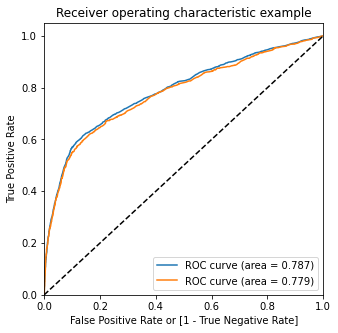

In [87]:
draw_roc(y_train, y_train_pred_rfe20_prob, y_test, y_test_pred_rfe20_prob)

In [88]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rfe20))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rfe20))

Accuracy train:  0.8993313660304061
Accuracy test:  0.9022137005403521


iii. Training model with hyperparameter tuning

In [89]:
lr_model = LogisticRegression()

In [90]:
# Create the parameter grid for logistic regression
lr_param_grid = {
    'max_iter': [75, 100, 125],
    'penalty': ['l1', 'l2'],
    'C': [0.5 , 1, 1.5],
    'solver': ['liblinear', 'lbfgs']
}
print(lr_param_grid)

{'max_iter': [75, 100, 125], 'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5], 'solver': ['liblinear', 'lbfgs']}


In [91]:
lr_grid = training_model_hyperparameter(lr_model, 'roc_auc', lr_param_grid, X_train, y_train)

In [92]:
y_train_pred_lr, y_train_pred_lr_prob, y_test_pred_lr, y_test_pred_lr_prob = \
                                    prediction_model(lr_grid, X_train, y_train, X_test, y_test)

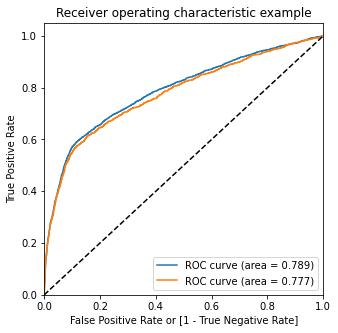

In [93]:
draw_roc(y_train, y_train_pred_lr_prob, y_test, y_test_pred_lr_prob)

In [94]:
lr_grid.best_params_

{'C': 0.5, 'max_iter': 75, 'penalty': 'l2', 'solver': 'liblinear'}

In [95]:
cv_results = pd.DataFrame(lr_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        1.084058      0.221459         0.038944        0.023564     0.5   
1        0.021353      0.002465         0.000000        0.000000     0.5   
2        0.416312      0.022826         0.012567        0.003129     0.5   
3        0.792501      0.357882         0.011470        0.001684     0.5   
4        0.916435      0.302774         0.017208        0.010805     0.5   
5        0.025829      0.011773         0.000000        0.000000     0.5   
6        0.516520      0.122959         0.020650        0.010717     0.5   
7        0.841141      0.165682         0.015373        0.006230     0.5   
8        0.894865      0.167121         0.011170        0.003806     0.5   
9        0.018653      0.004137         0.000000        0.000000     0.5   
10       0.388422      0.100573         0.013968        0.005702     0.5   
11       0.793154      0.199405         0.013327        0.005733     0.5   
12       1.009068      0.315476         0.012666        0.006386       1   
13       0.038735      0.021702         0.000000        0.000000       1   
14       0.348565      0.031268         0.011171        0.001936       1   
15       1.103942      0.458130         0.016927        0.006571       1   
16       1.530999      0.432718         0.017150        0.004747       1   
17       0.016961      0.002458         0.000000        0.000000       1   
18       0.426024      0.073646         0.012565        0.002998       1   
19       0.662380      0.111552         0.011054        0.003077       1   
20       0.792248      0.131540         0.011769        0.002593       1   
21       0.021244      0.003865         0.000000        0.000000       1   
22       0.468486      0.072901         0.020346        0.011000       1   
23       0.789665      0.102528         0.023868        0.021350       1   
24       1.346307      0.264750         0.020842        0.010488     1.5   
25       0.023888      0.003646         0.000000        0.000000     1.5   
26       0.540642      0.118677         0.021461        0.015368     1.5   
27       0.980549      0.193618         0.013183        0.003716     1.5   
28       1.034369      0.187323         0.011724        0.002786     1.5   
29       0.020845      0.003503         0.000000        0.000000     1.5   
30       0.396263      0.032483         0.011236        0.003193     1.5   
31       0.844296      0.077003         0.013986        0.003875     1.5   
32       1.415327      0.273042         0.017138        0.005577     1.5   
33       0.024561      0.003328         0.000000        0.000000     1.5   
34       0.553693      0.118800         0.014719        0.002860     1.5   
35       0.907018      0.257055         0.012975        0.004068     1.5   

   param_max_iter param_penalty param_solver  \
0              75            l1    liblinear   
1              75            l1        lbfgs   
2              75            l2    liblinear   
3              75            l2        lbfgs   
4             100            l1    liblinear   
5             100            l1        lbfgs   
6             100            l2    liblinear   
7             100            l2        lbfgs   
8             125            l1    liblinear   
9             125            l1        lbfgs   
10            125            l2    liblinear   
11            125            l2        lbfgs   
12             75            l1    liblinear   
13             75            l1        lbfgs   
14             75            l2    liblinear   
15             75            l2        lbfgs   
16            100            l1    liblinear   
17            100            l1        lbfgs   
18            100            l2    liblinear   
19            100            l2        lbfgs   
20            125            l1    liblinear   
21            125            l1        lbfgs   
22            125            l2    liblinear   
23            125            l2        

In [96]:
cv_results[["param_max_iter", "param_penalty", "param_solver", "mean_train_score","mean_test_score"]]

param_max_iter param_penalty param_solver  mean_train_score  \
0              75            l1    liblinear          0.788816   
1              75            l1        lbfgs               NaN   
2              75            l2    liblinear          0.789156   
3              75            l2        lbfgs          0.789152   
4             100            l1    liblinear          0.788816   
5             100            l1        lbfgs               NaN   
6             100            l2    liblinear          0.789156   
7             100            l2        lbfgs          0.789152   
8             125            l1    liblinear          0.788815   
9             125            l1        lbfgs               NaN   
10            125            l2    liblinear          0.789156   
11            125            l2        lbfgs          0.789152   
12             75            l1    liblinear          0.789027   
13             75            l1        lbfgs               NaN   
14             75            l2    liblinear          0.789170   
15             75            l2        lbfgs          0.789160   
16            100            l1    liblinear          0.789025   
17            100            l1        lbfgs               NaN   
18            100            l2    liblinear          0.789170   
19            100            l2        lbfgs          0.789160   
20            125            l1    liblinear          0.789026   
21            125            l1        lbfgs               NaN   
22            125            l2    liblinear          0.789170   
23            125            l2        lbfgs          0.789160   
24             75            l1    liblinear          0.789082   
25             75            l1        lbfgs               NaN   
26             75            l2    liblinear          0.789167   
27             75            l2        lbfgs          0.789160   
28            100            l1    liblinear          0.789084   
29            100            l1        lbfgs               NaN   
30            100            l2    liblinear          0.789167   
31            100            l2        lbfgs          0.789160   
32            125            l1    liblinear          0.789083   
33            125            l1        lbfgs               NaN   
34            125            l2    liblinear          0.789167   
35            125            l2        lbfgs          0.789160   

    mean_test_score  
0          0.785273  
1               NaN  
2          0.785404  
3          0.785396  
4          0.785287  
5               NaN  
6          0.785404  
7          0.785396  
8          0.785290  
9               NaN  
10         0.785404  
11         0.785396  
12         0.785296  
13              NaN  
14         0.785390  
15         0.785386  
16         0.785294  
17              NaN  
18         0.785390  
19         0.785385  
20         0.785292  
21              NaN  
22         0.785390  
23         0.785385  
24         0.785321  
25              NaN  
26         0.785369  
27         0.785382  
28         0.785314  
29              NaN  
30         0.785369  
31         0.785382  
32         0.785302  
33              NaN  
34         0.785369  
35         0.785382

In [97]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_lr))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_lr))

Accuracy train:  0.8991819506182063
Accuracy test:  0.9016907791528673


iv. Random Forest Classifier

Train Random Forest Classifier model with hyperparameter tuning

In [98]:
# Create the parameter grid for random forest
param_grid_rf = [{'n_estimators': [30, 50, 75, 100],
               'max_depth': [5, 6, 7, 8, 9, 10],
               'max_features': [10, 15, 25, 30]}]
print(param_grid_rf)

[{'n_estimators': [30, 50, 75, 100], 'max_depth': [5, 6, 7, 8, 9, 10], 'max_features': [10, 15, 25, 30]}]


In [99]:
rf_model = RandomForestClassifier()

In [100]:
rf_grid = training_model_hyperparameter(rf_model, 'roc_auc', param_grid_rf, X_train, y_train)

In [101]:
rf_grid.best_params_

{'max_depth': 10, 'max_features': 15, 'n_estimators': 75}

In [102]:
cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.028362      0.184379         0.038153        0.018140   
1        1.793093      0.149195         0.069100        0.040606   
2        2.932435      0.340334         0.078980        0.015036   
3        2.991280      0.428724         0.084354        0.043159   
4        1.217772      0.135072         0.030247        0.008674   
..            ...           ...              ...             ...   
91       5.176329      0.077838         0.054954        0.004532   
92       1.827813      0.031609         0.022522        0.005351   
93       3.102170      0.070217         0.029014        0.003539   
94       5.084910      0.422541         0.043776        0.003376   
95       6.464115      0.447680         0.055565        0.008545   

   param_max_depth param_max_features param_n_estimators  \
0                5                 10                 30   
1                5                 10                 50   
2                5                 10                 75   
3                5                 10                100   
4                5                 15                 30   
..             ...                ...                ...   
91              10                 25                100   
92              10                 30                 30   
93              10                 30                 50   
94              10                 30                 75   
95              10                 30                100   

                                               params  split0_test_score  \
0   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.784064   
1   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.784951   
2   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.784687   
3   {'max_depth': 5, 'max_features': 10, 'n_estima...           0.787817   
4   {'max_depth': 5, 'max_features': 15, 'n_estima...           0.783666   
..                                                ...                ...   
91  {'max_depth': 10, 'max_features': 25, 'n_estim...           0.788321   
92  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.781882   
93  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.784539   
94  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.783372   
95  {'max_depth': 10, 'max_features': 30, 'n_estim...           0.786792   

    split1_test_score  ...  split2_train_score  split3_train_score  \
0            0.772830  ...            0.797190            0.799619   
1            0.777471  ...            0.797541            0.794975   
2            0.779316  ...            0.799262            0.799210   
3            0.779062  ...            0.798545            0.798258   
4            0.782620  ...            0.801120            0.799445   
..                ...  ...                 ...                 ...   
91           0.784056  ...            0.878179            0.877769   
92           0.778481  ...            0.884157            0.881260   
93           0.782890  ...            0.881131            0.886139   
94           0.781850  ...            0.886180            0.884703   
95           0.779969  ...            0.882413            0.884570   

    split4_train_score  split5_train_score  split6_train_score  \
0             0.798519            0.795807            0.792590   
1             0.802203            0.795729            0.792292   
2             0.801747            0.794878            0.796041   
3             0.800631            0.795250            0.794164   
4             0.801392            0.793605            0.795502   
..                 ...                 ...                 ...   
91            0.879811            0.876543            0.876723   
92            0.880618            0.874557            0.879430   
93            0.882525            0.879196            0.880551   
94            0.887700            0.882402          

In [103]:
cv_results[["param_max_depth","param_max_features","param_n_estimators","mean_train_score","mean_test_score"]]

param_max_depth param_max_features param_n_estimators  mean_train_score  \
0                5                 10                 30          0.796425   
1                5                 10                 50          0.796569   
2                5                 10                 75          0.797387   
3                5                 10                100          0.797476   
4                5                 15                 30          0.798143   
..             ...                ...                ...               ...   
91              10                 25                100          0.878861   
92              10                 30                 30          0.880194   
93              10                 30                 50          0.881634   
94              10                 30                 75          0.883565   
95              10                 30                100          0.883424   

    mean_test_score  
0          0.789682  
1          0.789300  
2          0.791199  
3          0.791599  
4          0.792216  
..              ...  
91         0.797174  
92         0.795385  
93         0.796370  
94         0.796089  
95         0.797154  

[96 rows x 5 columns]

In [104]:
y_train_pred_rf, y_train_pred_rf_prob, y_test_pred_rf, y_test_pred_rf_prob = \
                                    prediction_model(rf_grid, X_train, y_train, X_test, y_test)

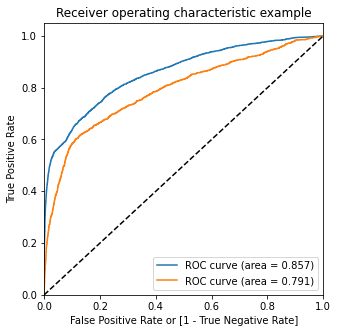

In [105]:
draw_roc(y_train, y_train_pred_rf_prob, y_test, y_test_pred_rf_prob)

In [106]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_rf))

Accuracy train:  0.9227522318927197
Accuracy test:  0.9047411539131951


v. Gradient Boosting Classifier

Train Gradient Boosting Classifier model with hyperparameter tuning

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gb_model = GradientBoostingClassifier(verbose = 1)

In [109]:
params_grid_gb = {
    "n_iter_no_change": ['None', 5, 10],
    "n_estimators": [30, 50, 75, 100],
    "learning_rate": [0.05, 0.1, 0.15]
}

In [110]:
gb_grid = training_model_hyperparameter(gb_model, 'roc_auc', params_grid_gb, X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.6504            3.47s
         2           0.6248            3.09s
         3           0.6089            3.54s
         4           0.5966            3.28s
         5           0.5874            3.22s
         6           0.5810            3.18s
         7           0.5747            2.92s
         8           0.5711            2.91s
         9           0.5668            2.83s
        10           0.5639            2.81s
        20           0.5500            2.20s
        30           0.5438            1.80s
        40           0.5400            1.37s


In [111]:
gb_grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 75, 'n_iter_no_change': 10}

In [112]:
cv_results = pd.DataFrame(gb_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.050610      0.005286         0.000000        0.000000   
1        2.708837      0.077941         0.011373        0.001476   
2        2.650310      0.074016         0.010188        0.001766   
3        0.049361      0.004804         0.000000        0.000000   
4        4.357445      0.112991         0.011951        0.001867   
5        4.268545      0.039571         0.010960        0.000855   
6        0.052220      0.004440         0.000000        0.000000   
7        6.331990      0.300941         0.010810        0.001451   
8        6.235592      0.233328         0.010453        0.001619   
9        0.048719      0.004187         0.000000        0.000000   
10       7.701230      1.142292         0.013467        0.002564   
11       7.087971      1.124485         0.010738        0.004782   
12       0.044857      0.009253         0.000000        0.000000   
13       2.388893      0.021279         0.009728        0.004272   
14       2.485896      0.093877         0.009708        0.000823   
15       0.047960      0.007104         0.000000        0.000000   
16       4.102615      1.076599         0.011279        0.004407   
17       5.246562      0.478089         0.012480        0.005224   
18       0.046077      0.010266         0.000000        0.000000   
19       4.984726      0.996497         0.010170        0.005487   
20       6.802714      0.949363         0.010334        0.005546   
21       0.066753      0.011189         0.000000        0.000000   
22       5.205379      1.316482         0.009207        0.005818   
23       6.493502      1.450738         0.008444        0.004593   
24       0.040542      0.005852         0.000000        0.000000   
25       2.393609      0.081295         0.009977        0.001116   
26       2.421131      0.040978         0.010471        0.002044   
27       0.042617      0.005002         0.000000        0.000000   
28       3.357824      0.375664         0.009105        0.002436   
29       3.815445      0.188791         0.010429        0.005732   
30       0.045872      0.007259         0.000000        0.000000   
31       3.110868      0.573301         0.008915        0.002425   
32       4.880777      0.673662         0.008750        0.004990   
33       0.041392      0.000979         0.000000        0.000000   
34       3.425313      0.657332         0.008935        0.003182   
35       4.378824      1.310960         0.007121        0.004388   

   param_learning_rate param_n_estimators param_n_iter_no_change  \
0                 0.05                 30                   None   
1                 0.05                 30                      5   
2                 0.05                 30                     10   
3                 0.05                 50                   None   
4                 0.05                 50                      5   
5                 0.05                 50                     10   
6                 0.05                 75                   None   
7                 0.05                 75                      5   
8                 0.05                 75                     10   
9                 0.05                100                   None   
10                0.05                100                      5   
11                0.05                100                     10   
12                 0.1                 30                   None   
13                 0.1                 30                      5   
14                 0.1                 30                     10   
15                 0.1                 50                   None   
16                 0.1                 50                      5   
17                 0.1                 50                     10   
18                 0.1                 75                   None   
19                 0.1                 75                      5   
20                 0.1                 75                  

In [113]:
cv_results[["param_learning_rate","param_n_estimators","param_n_iter_no_change","mean_train_score","mean_test_score"]]

param_learning_rate param_n_estimators param_n_iter_no_change  \
0                 0.05                 30                   None   
1                 0.05                 30                      5   
2                 0.05                 30                     10   
3                 0.05                 50                   None   
4                 0.05                 50                      5   
5                 0.05                 50                     10   
6                 0.05                 75                   None   
7                 0.05                 75                      5   
8                 0.05                 75                     10   
9                 0.05                100                   None   
10                0.05                100                      5   
11                0.05                100                     10   
12                 0.1                 30                   None   
13                 0.1                 30                      5   
14                 0.1                 30                     10   
15                 0.1                 50                   None   
16                 0.1                 50                      5   
17                 0.1                 50                     10   
18                 0.1                 75                   None   
19                 0.1                 75                      5   
20                 0.1                 75                     10   
21                 0.1                100                   None   
22                 0.1                100                      5   
23                 0.1                100                     10   
24                0.15                 30                   None   
25                0.15                 30                      5   
26                0.15                 30                     10   
27                0.15                 50                   None   
28                0.15                 50                      5   
29                0.15                 50                     10   
30                0.15                 75                   None   
31                0.15                 75                      5   
32                0.15                 75                     10   
33                0.15                100                   None   
34                0.15                100                      5   
35                0.15                100                     10   

    mean_train_score  mean_test_score  
0                NaN              NaN  
1           0.787644         0.785826  
2           0.784164         0.782950  
3                NaN              NaN  
4           0.792958         0.790531  
5           0.792689         0.789813  
6                NaN              NaN  
7           0.796308         0.790462  
8           0.796794         0.791889  
9                NaN              NaN  
10          0.799287         0.792319  
11          0.799625         0.794065  
12               NaN              NaN  
13          0.794247         0.791039  
14          0.794241         0.790704  
15               NaN              NaN  
16          0.799079         0.791684  
17          0.800687         0.793589  
18               NaN              NaN  
19          0.802368         0.794198  
20          0.803928         0.794017  
21               NaN              NaN  
22          0.802020         0.793156  
23          0.806097         0.794693  
24               NaN              NaN  
25          0.799847         0.793303  
26          0.799147         0.792308  
27               NaN              NaN  
28          0.804085         0.794772  
29          0.804960         0.794319  
30               NaN              NaN  
31          0.802191         0.793603  
32          0.807773         0.796257  
33               NaN              NaN  
34          0.803693         0.794167  
35          0.806676         0.794273

In [114]:
y_train_pred_gb, y_train_pred_gb_prob, y_test_pred_gb, y_test_pred_gb_prob = \
                                    prediction_model(gb_grid, X_train, y_train, X_test, y_test)

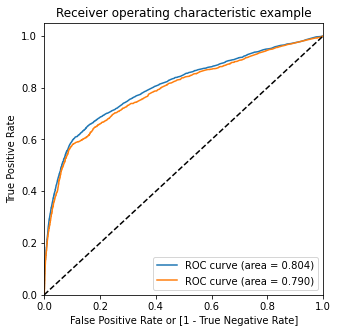

In [115]:
draw_roc(y_train, y_train_pred_gb_prob, y_test, y_test_pred_gb_prob)

In [116]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_gb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_gb))

Accuracy train:  0.9029920436293004
Accuracy test:  0.9043925396548719


vi. SVM (Support Vector Machine)

Train Gradient Boosting Classifier model with hyperparameter tuning

In [117]:
from sklearn.svm import SVC

In [118]:
svc_model = SVC()

In [119]:
params_grid_svc = {
    "kernel": ["linear", "rbf"],
    "degree": [1, 2]
}

In [120]:
svc_grid = training_model_hyperparameter(svc_model, 'roc_auc', params_grid_svc, X_train, y_train)

In [121]:
svc_grid.best_params_

{'degree': 1, 'kernel': 'rbf'}

In [122]:
cv_results = pd.DataFrame(svc_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_degree  \
0      12.750085      0.656515         0.708241        0.023239            1   
1      44.014315      5.651435         2.896783        0.251340            1   
2      10.912246      0.866443         0.624719        0.031146            2   
3      40.653271      5.256153         2.619604        0.322490            2   

  param_kernel                             params  split0_test_score  \
0       linear  {'degree': 1, 'kernel': 'linear'}           0.642494   
1          rbf     {'degree': 1, 'kernel': 'rbf'}           0.709735   
2       linear  {'degree': 2, 'kernel': 'linear'}           0.642494   
3          rbf     {'degree': 2, 'kernel': 'rbf'}           0.709735   

   split1_test_score  split2_test_score  ...  split2_train_score  \
0           0.543411           0.637300  ...            0.648370   
1           0.694956           0.706878  ...            0.860659   
2           0.543411           0.637300  ...            0.648370   
3           0.694956           0.706878  ...            0.860659   

   split3_train_score  split4_train_score  split5_train_score  \
0            0.559442            0.646315            0.589565   
1            0.861591            0.862816            0.860397   
2            0.559442            0.646315            0.589565   
3            0.861591            0.862816            0.860397   

   split6_train_score  split7_train_score  split8_train_score  \
0            0.629662            0.588690            0.595319   
1            0.864816            0.866964            0.861973   
2            0.629662            0.588690            0.595319   
3            0.864816            0.866964            0.861973   

   split9_train_score  mean_train_score  std_train_score  
0            0.623317          0.607347         0.035894  
1            0.863077          0.862975         0.002527  
2            0.623317          0.607347         0.035894  
3            0.863077          0.862975         0.002527  

[4 rows x 32 columns]

In [123]:
cv_results[["param_kernel","param_degree","mean_train_score","mean_test_score"]]

param_kernel param_degree  mean_train_score  mean_test_score
0       linear            1          0.607347         0.605802
1          rbf            1          0.862975         0.713407
2       linear            2          0.607347         0.605802
3          rbf            2          0.862975         0.713407

In [124]:
print("Accuracy train: ", accuracy_score(y_train, svc_grid.predict(X_train)))
print("Accuracy test: ", accuracy_score(y_test, svc_grid.predict(X_test)))

Accuracy train:  0.9004146277688544
Accuracy test:  0.9024751612340944


vii. XGBoost Classifier

In [125]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [126]:
pip install xgboost --no-binary xgboost -v

Using pip 21.0.1 from C:\Users\Shriram\anaconda3\lib\site-packages\pip (python 3.8)
Non-user install because site-packages writeable
Created temporary directory: C:\Users\Shriram\AppData\Local\Temp\pip-ephem-wheel-cache-u7kjukke
Created temporary directory: C:\Users\Shriram\AppData\Local\Temp\pip-req-tracker-y4s684xs
Initialized build tracking at C:\Users\Shriram\AppData\Local\Temp\pip-req-tracker-y4s684xs
Created build tracker: C:\Users\Shriram\AppData\Local\Temp\pip-req-tracker-y4s684xs
Entered build tracker: C:\Users\Shriram\AppData\Local\Temp\pip-req-tracker-y4s684xs
Created temporary directory: C:\Users\Shriram\AppData\Local\Temp\pip-install-k3rqizlg
Created temporary directory: C:\Users\Shriram\AppData\Local\Temp\pip-unpack-yqendxxs
Removed build tracker: 'C:\\Users\\Shriram\\AppData\\Local\\Temp\\pip-req-tracker-y4s684xs'
Note: you may need to restart the kernel to use updated packages.


In [127]:
from xgboost import XGBClassifier

In [128]:
xgb_model = XGBClassifier()

In [129]:
# Create the param grid for random forest
param_grid_xgb = {
               'max_depth': [5, 7],
               'max_features': [10, 20, 30]}
print(param_grid_xgb)

{'max_depth': [5, 7], 'max_features': [10, 20, 30]}


In [130]:
xgb_grid = training_model_hyperparameter(xgb_model, 'roc_auc', param_grid_xgb, X_train, y_train)

[18:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [131]:
cv_results = pd.DataFrame(xgb_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.315838      0.033560         0.012297        0.003989   
1       2.289806      0.032760         0.014532        0.004440   
2       3.529815      1.872012         0.013595        0.004001   
3       3.774335      1.606500         0.013694        0.004489   
4       5.310023      2.564862         0.035185        0.042348   
5       3.766567      1.635607         0.016736        0.004548   

  param_max_depth param_max_features                                params  \
0               5                 10  {'max_depth': 5, 'max_features': 10}   
1               5                 20  {'max_depth': 5, 'max_features': 20}   
2               5                 30  {'max_depth': 5, 'max_features': 30}   
3               7                 10  {'max_depth': 7, 'max_features': 10}   
4               7                 20  {'max_depth': 7, 'max_features': 20}   
5               7                 30  {'max_depth': 7, 'max_features': 30}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.782246           0.775093           0.770060  ...   
1           0.782246           0.775093           0.770060  ...   
2           0.782246           0.775093           0.770060  ...   
3           0.759560           0.747152           0.749682  ...   
4           0.759560           0.747152           0.749682  ...   
5           0.759560           0.747152           0.749682  ...   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.885882            0.882860            0.885945   
1            0.885882            0.882860            0.885945   
2            0.885882            0.882860            0.885945   
3            0.944291            0.940749            0.937250   
4            0.944291            0.940749            0.937250   
5            0.944291            0.940749            0.937250   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.881853            0.880066            0.882578   
1            0.881853            0.880066            0.882578   
2            0.881853            0.880066            0.882578   
3            0.941922            0.938714            0.942799   
4            0.941922            0.938714            0.942799   
5            0.941922            0.938714            0.942799   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.879620            0.879945          0.883352         0.003145  
1            0.879620            0.879945          0.883352         0.003145  
2            0.879620            0.879945          0.883352         0.003145  
3            0.942377            0.934976          0.940443         0.003028  
4            0.942377            0.934976          0.940443         0.003028  
5            0.942377            0.934976          0.940443         0.003028  

[6 rows x 32 columns]

In [132]:
cv_results[["param_max_depth","param_max_features","mean_train_score","mean_test_score"]]

param_max_depth param_max_features  mean_train_score  mean_test_score
0               5                 10          0.883352         0.788254
1               5                 20          0.883352         0.788254
2               5                 30          0.883352         0.788254
3               7                 10          0.940443         0.770187
4               7                 20          0.940443         0.770187
5               7                 30          0.940443         0.770187

In [133]:
y_train_pred_xgb, y_train_pred_xgb_prob, y_test_pred_xgb, y_test_pred_xgb_prob = \
                                    prediction_model(xgb_grid, X_train, y_train, X_test, y_test)

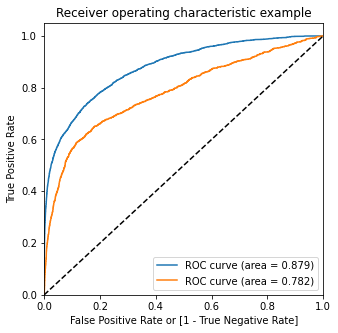

In [134]:
draw_roc(y_train, y_train_pred_xgb_prob, y_test, y_test_pred_xgb_prob)

In [135]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_xgb))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_xgb))

Accuracy train:  0.9235740166598184
Accuracy test:  0.9026494683632561


Compare Models

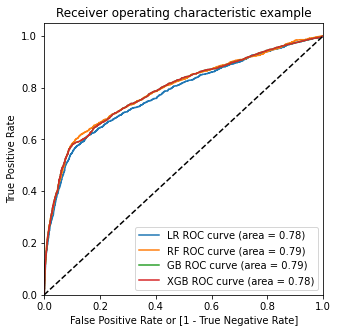

In [136]:
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve( y_test, y_test_pred_lr_prob,
                                              drop_intermediate = False )
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve( y_test, y_test_pred_rf_prob,
                                              drop_intermediate = False )
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve( y_test, y_test_pred_gb_prob,
                                              drop_intermediate = False )
xgb_fpr, xgb_tpr, xgb_thresholds = metrics.roc_curve( y_test, y_test_pred_xgb_prob,
                                              drop_intermediate = False )
lr_auc_score = metrics.roc_auc_score( y_test, y_test_pred_lr_prob )
rf_auc_score = metrics.roc_auc_score( y_test, y_test_pred_rf_prob )
gb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_gb_prob )
xgb_auc_score = metrics.roc_auc_score( y_test, y_test_pred_xgb_prob )
plt.figure(figsize=(5, 5))
plt.plot( lr_fpr, lr_tpr, label='LR ROC curve (area = %0.2f)' % lr_auc_score )
plt.plot( rf_fpr, rf_tpr, label='RF ROC curve (area = %0.2f)' % rf_auc_score )
plt.plot( gb_fpr, gb_tpr, label='GB ROC curve (area = %0.2f)' % gb_auc_score )
plt.plot( gb_fpr, gb_tpr, label='XGB ROC curve (area = %0.2f)' % xgb_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

References:
https://www.kaggle.com/code/zyper26/bank-marketing-lr-rf-gb-svm-xgboost
